# Task - 1
# Prediction Using Supervised Learning
## Name: Amara Santosh Jayanth
### Data Science and Business Analytics at The Sparks Foundation

Importing all the required Packages.

In [21]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading Data from the Raw Link.

In [22]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration
Let's first have a descriptive exploration on our data.

In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


After exploring the given data, I found two variables which causes the impact of our Analysis.
So lets Plot a 2-D plot Of 'Hours' against 'Scores' in the given data.

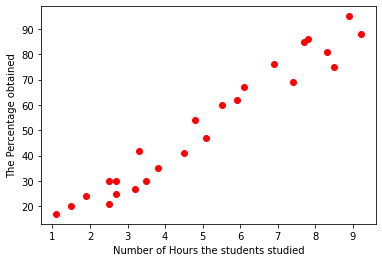

In [24]:
plt.scatter(data.Hours,data.Scores, color='red')
plt.xlabel("Number of Hours the students studied")
plt.ylabel("The Percentage obtained")
plt.show()

Here, we can see that the curve is increasing similar to an inclined straight line, which concludes us that we can use the simple linear regression to predict the percentage of a student for the number of hours he/she studies.

### Now lets create Train and Test data sets from the given data
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This helps us to get out of sample accuracy in predicting the target variable.
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [25]:
#Creating the mask and splitting it as train_data (80% of data) and test_data(20% of data)
mask=np.random.rand(len(data))<0.8
train_data=data[mask]
test_data=data[~mask]

#now lets look the head of both train and test data
print("Train Data")
print(train_data.head())
print("Test Data")
print(test_data.head())

Train Data
   Hours  Scores
0    2.5      21
2    3.2      27
3    8.5      75
5    1.5      20
6    9.2      88
Test Data
    Hours  Scores
1     5.1      47
4     3.5      30
10    7.7      85
15    8.9      95
17    1.9      24


## Now lets start the Simple Linear Regression Model on the test and train data

Train - Data Distribution

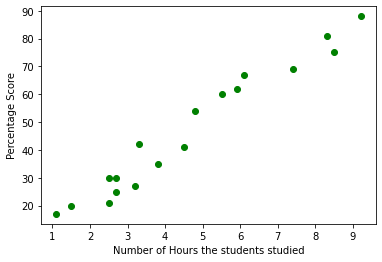

In [26]:
plt.scatter(train_data.Hours,train_data.Scores, color='green')
plt.xlabel("Number of Hours the students studied")
plt.ylabel("Percentage Score")
plt.show()

## Modeling
Using sklearn package to model data

In [27]:
#splitting the train data into respective variables.
train_x = np.asanyarray(train_data[['Hours']])
train_y = np.asanyarray(train_data[['Scores']])

## Training the data

In [28]:
from sklearn import linear_model
#Using linear regression model as our data seems to be linear.
regr = linear_model.LinearRegression()
regr.fit (train_x, train_y)
# The coefficients (Finding the intercept and slope of the linear regression line)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.01824077]]
Intercept:  [5.05427199]


Coefficient and Intercept in the simple linear regression are used as the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.

### Plot the Fit Line( Linear Regression Line)

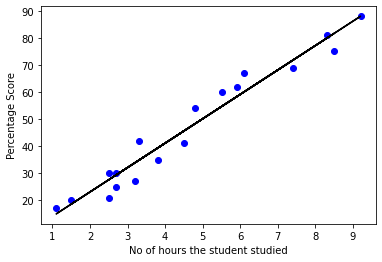

In [29]:
#plotting the train data after splitting.
plt.scatter(train_x,train_y,color ='blue')
#plotting the fit line.
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],color='black')
plt.xlabel("No of hours the student studied")
plt.ylabel("Percentage Score")
plt.show()

### Now we predict the target variable of test data

We compare the actual values and predicted values. And we calculate the accuracy of our regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

In [32]:
#splitting the test data into primary and target variables.
test_x = np.asanyarray(test_data[['Hours']])
test_y = np.asanyarray(test_data[['Scores']])

#Predicting The Scores from the Hours.
pred_y=regr.predict(test_x)

#converting into 1-D array.
pred_y=pred_y.ravel()
test_y=test_y.ravel()

Now lets create a data frame containing actual values and predicted values.

In [31]:
compare=pd.DataFrame({"Actual": test_y,"Predicted": pred_y},index=list(range(0,pred_y.shape[0])))
compare.head()
    

,Actual,Predicted
0,47,51.047300
1,30,36.618115
2,85,74.494726
3,95,85.316615
4,24,22.188929


Predicting it with our Own value. What will be the predicted score, if a student studies 9.25 hours/day?


In [35]:
user_hours=[[9.25]]
pred_score=regr.predict(user_hours)
print("the no of hours studied: {}".format(user_hours))
print("the score predicted: {}".format(pred_score[0]))

the no of hours studied: [[9.25]]
the score predicted: [88.4729991]


Now so we have got the predicted value of our own input. But how accurate is the value?
There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data.

In [40]:
#importing r2_score.
from sklearn import metrics

print("The mean absolute error: %.2f" % np.mean(np.absolute(test_y-pred_y)))
print("Residual sum of squares: %.2f" % np.mean((test_y-pred_y)**2))
print("R2 score: %.2f" % r2_score(test_y,pred_y))

The mean absolute error: 7.43
Residual sum of squares: 65.15
R2 score: 0.91


The more or closer the r2 score is to 1.0 is the better in prediction.